In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
sns.set()

In [2]:
train_df= pd.read_csv('german_credit_data.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
train_df.isnull()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,True,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [4]:
train_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
train_df = train_df.drop(columns=['Unnamed: 0']) 

In [6]:
train_df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [7]:
train_df['Saving accounts'] = train_df['Saving accounts'].fillna(value = 'NA')

In [8]:
print(train_df['Saving accounts'].value_counts())

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


In [9]:
train_df['Checking account'] = train_df['Checking account'].fillna(value = 'NA')

In [10]:
train_df['Checking account'].value_counts()

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [11]:
x= train_df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose']]
y = train_df['Risk']

In [12]:
# List to store Categorical Columns
cat_cols = list(x.columns[x.dtypes == 'object'])
print("Categorical Columns: ",cat_cols)

Categorical Columns:  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [13]:
# List to store Numerical Columns
num_cols = list(x.columns[x.dtypes != 'object'])
print("\nNumerical Columns:" ,num_cols)


Numerical Columns: ['Age', 'Job', 'Credit amount', 'Duration']


In [14]:
## One-Hot Encoding Categorical Columns
x_dummy =  pd.get_dummies(x[cat_cols], drop_first=True)

## Joining New dummified and Numerical columns
x_new = pd.concat([x_dummy, x[num_cols]], axis=1, join='inner')

#### Normalizing th Dataset
ss = StandardScaler()

x_normal = ss.fit_transform(x_new)

In [15]:
x_int, x_test, y_int, y_test = train_test_split(x_normal, y, test_size=100, stratify=y, random_state = 1)

In [16]:
x_train,x_val,y_train,y_val = train_test_split(x_int, y_int, test_size=100, stratify = y_int, random_state = 1)

In [17]:
print('train: {}% | Validation: {}% | Test: {}%'.format( round(len(y_train)/len(y),2), 
                                                        round(len(y_val)/len(y) ,2), 
                                                        round(len(y_test)/len(y),2) ) )

train: 0.8% | Validation: 0.1% | Test: 0.1%


In [18]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [19]:
y_pred = knn.predict(x_test)

In [20]:
y_pred

array(['bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good'], dtype=object)

In [21]:
confusion_matrix(y_test, y_pred)

array([[ 9, 21],
       [ 8, 62]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, y_pred)

0.71

In [24]:
from sklearn.metrics import precision_recall_fscore_support

In [25]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.52941176, 0.74698795]),
 array([0.3       , 0.88571429]),
 array([0.38297872, 0.81045752]),
 array([30, 70], dtype=int64))

In [26]:
from sklearn.metrics import precision_score

In [27]:
precision_score(y_test, y_pred, average='weighted')

0.6817150956768249

In [28]:
from sklearn.metrics import recall_score

In [29]:
recall_score(y_test, y_pred, average='weighted')

0.71

In [30]:
from sklearn.metrics import f1_score

In [31]:
f1_score(y_test, y_pred, average='weighted')

0.682213878459185

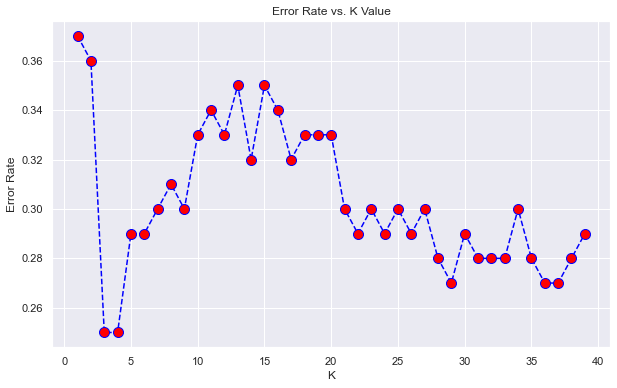

Minimum error:- 0.25 at K = 3


In [32]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [33]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [34]:
y_pred = knn.predict(x_test)

In [35]:
accuracy_score(y_test, y_pred)

0.75

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
from sklearn import tree

In [37]:
ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [38]:
ct.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_te = ct.predict(x_test)

In [40]:
np.sum((y_test == y_te))/y_test.size

0.71

In [41]:
print(train_df.describe())

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


In [42]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
classifier = dtree(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

Y_pred = classifier.predict(X_test)

In [43]:
print("Predicted Values : ",Y_pred[1:1000])

Predicted Values :  ['bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good']


[Text(355.65328446306165, 372.2478260869565, 'X[7] <= 0.493\nentropy = 0.881\nsamples = 800\nvalue = [240, 560]'),
 Text(210.57275323686213, 355.70347826086953, 'X[8] <= 0.504\nentropy = 0.779\nsamples = 577\nvalue = [133, 444]'),
 Text(119.49402132520945, 339.1591304347826, 'X[19] <= 1.457\nentropy = 0.577\nsamples = 357\nvalue = [49, 308]'),
 Text(81.4051028179741, 322.61478260869563, 'X[17] <= 1.126\nentropy = 0.53\nsamples = 333\nvalue = [40, 293]'),
 Text(39.90571210967251, 306.0704347826087, 'X[17] <= -1.133\nentropy = 0.582\nsamples = 280\nvalue = [39, 241]'),
 Text(8.15963442498096, 289.52608695652174, 'X[3] <= -0.201\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(4.07981721249048, 272.9817391304348, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(12.23945163747144, 272.9817391304348, 'X[17] <= -1.263\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(8.15963442498096, 256.4373913043478, 'X[2] <= 0.822\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(4.079

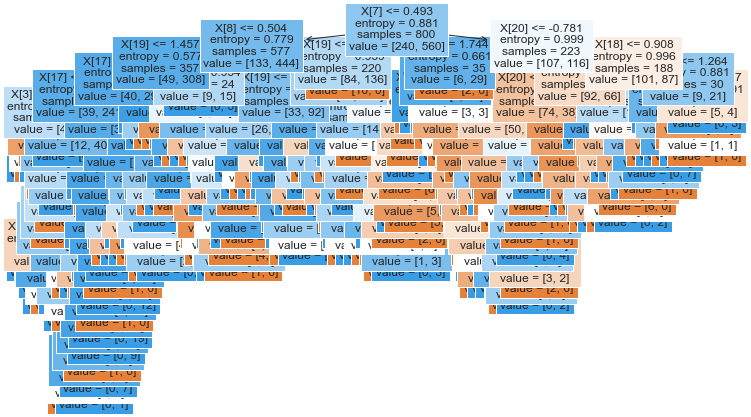

In [44]:
plt.figure(figsize=(12,7))
tree.plot_tree(classifier, filled=True, fontsize=12)

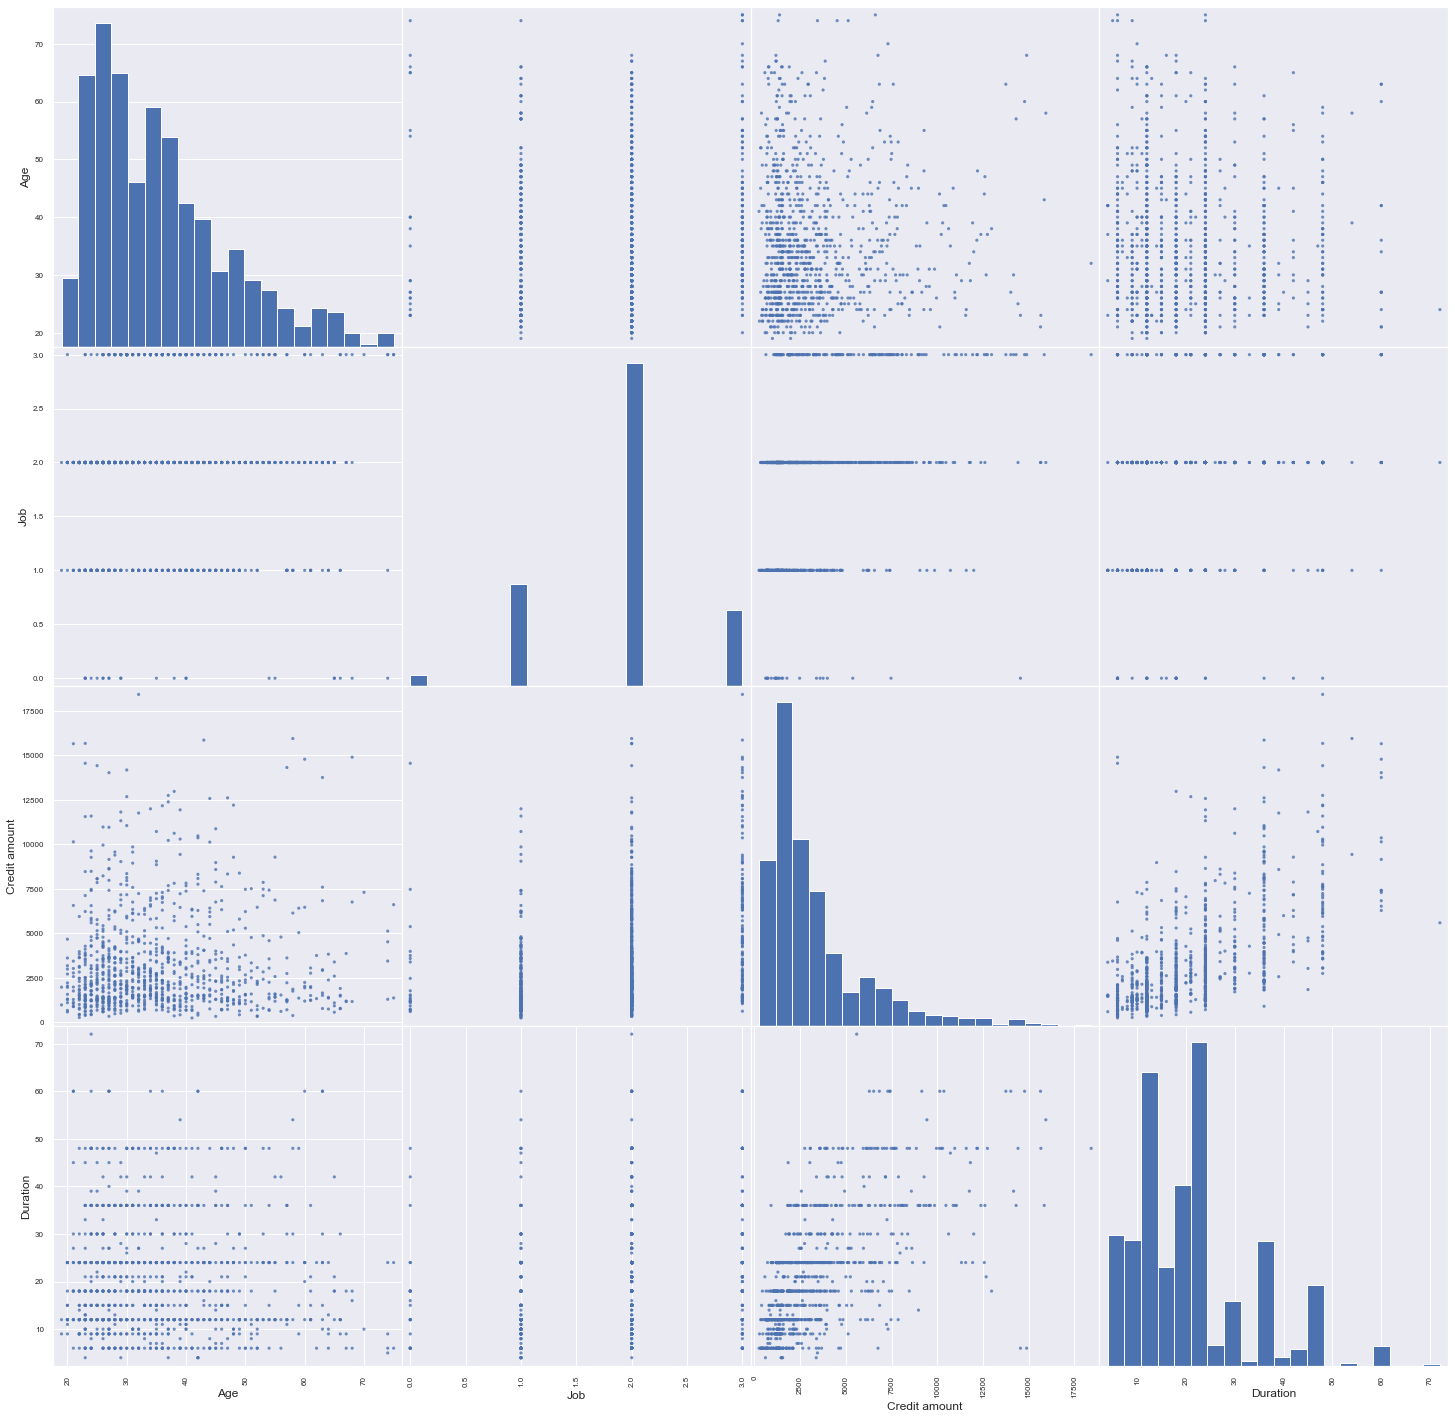

In [45]:
X_dataframe = train_df

grr = pd.plotting.scatter_matrix(X_dataframe, figsize=(25, 25), marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)

In [46]:
print(format(accuracy_score(y_test, Y_pred)))


0.7


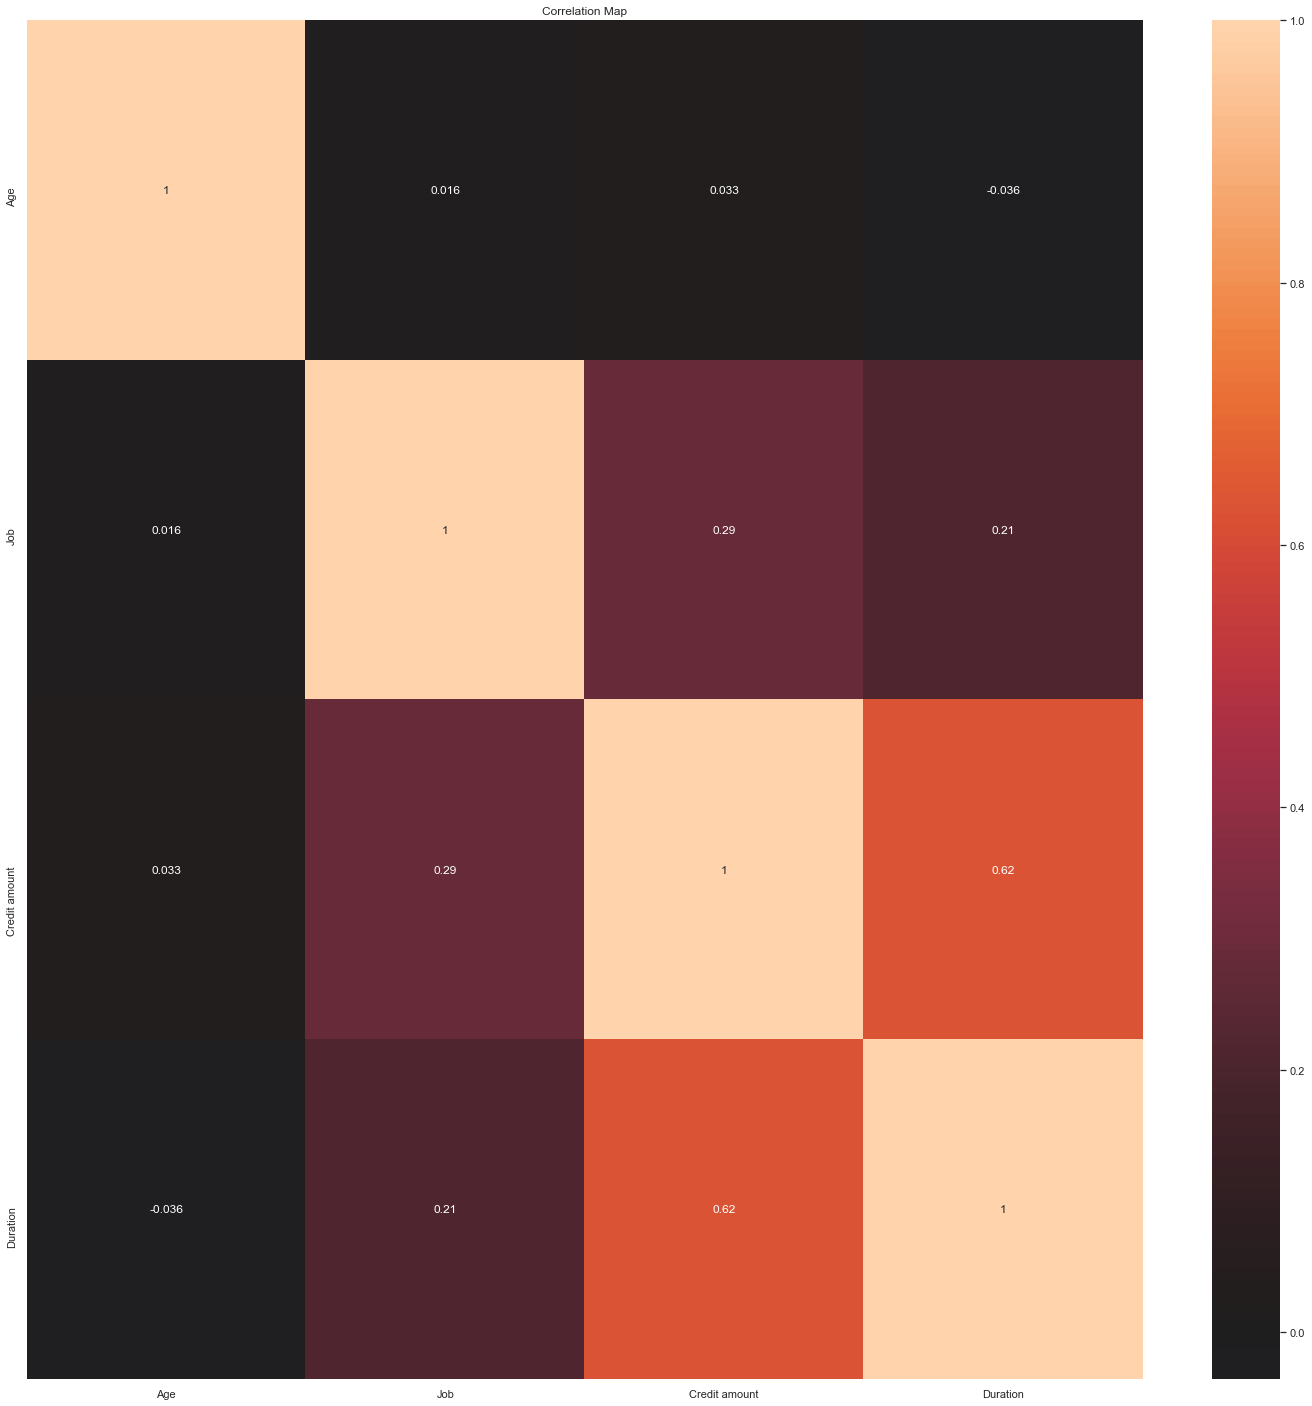

In [47]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(train_df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [48]:
clf=RandomForestClassifier(n_estimators=3)

In [49]:
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [50]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.67


In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 9, 21],
       [12, 58]], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.43      0.30      0.35        30
        good       0.73      0.83      0.78        70

    accuracy                           0.67       100
   macro avg       0.58      0.56      0.57       100
weighted avg       0.64      0.67      0.65       100



In [53]:
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.76
